### Question 1

#### **Forward Propagation to calculate output from the second layer**

##### Given:

Input: $[x_1, x_2] = [1, 0]$ <br>
Weight matrices:
$$
H1 = \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \end{pmatrix}
$$
$$
H2 = \begin{pmatrix} 1 & 1 & 0 & 1.5 \end{pmatrix}
$$
Bias matrices:
$$
B1 = \begin{pmatrix} 0.15 & 0.15 & 0.15 & 0.15 \end{pmatrix}
$$
$$
B2 = 0
$$

Activation function: tanh ($\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$)

$$
y1 = X \cdot H1 + B1
$$

$$
y1 =  \begin{pmatrix} 1 & 0 \end{pmatrix}\cdot \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \end{pmatrix} + \begin{pmatrix} 0.15 & 0.15 & 0.15 & 0.15 \end{pmatrix}
$$

$$
y1 = \begin{pmatrix} 1 & 0 & 1 & 0 \end{pmatrix} + \begin{pmatrix} 0.15 & 0.15 & 0.15 & 0.15 \end{pmatrix} = \begin{pmatrix} 1.15 & 0.15 & 1.15 & 0.15 \end{pmatrix}
$$

Applying the activation function tanh:
$$
Y1 = \tanh\left(\begin{pmatrix} 1.15 & 0.15 & 1.15 & 0.15 \end{pmatrix}\right)
$$

$$
Y1 \approx \begin{pmatrix} 0.815 & 0.149 & 0.815 & 0.149 \end{pmatrix}
$$


Now, the output from the hidden layer $H1$ is used as input to the layer $H2$ or the output layer. 

$$
y2 = Y1 \cdot H2^T + B2
$$

$$
y2 = \begin{pmatrix} 0.815 & 0.149 & 0.815 & 0.149 \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 1 \\ 0 \\ 1.5 \end{pmatrix} + 0
$$


$$
y2 = 1 \cdot 0.815 \cdot 1 + 0.149 \cdot 1 + 0.815 \cdot 0 + 0.149 \cdot 1.5
$$

$$
y2 = 0.815 + 0.149 + 0 + 0.224 = 1.188
$$

Applying the activation function tanh:

$$
Y2 = \tanh(1.188) \approx 0.831
$$

Output of the network is:

$$
Y2 = 0.831
$$

#### Back Propagation and Gradient Descent Update for $H_2$ and $B_2$

**Gradient of the L with Respect to $Y_2$:**

Loss Function: 
$$
L = \frac{1}{N} \sum_{i=1}^{N} \left( Y_2 - Y \right)^2
$$

In this problem, N = 1

So, $ L = \left( Y_2 - Y \right)^2 $
$$
\frac{\partial L}{\partial Y_2} = 2(Y_2 - Y)
$$
Where $ Y_2 = 0.831 $ (predicted) and $ Y = 1 $ (true label):
$$
\frac{\partial L}{\partial Y_2} = 2.(0.831 - 1) = -0.338
$$

**Gradient of $ Y_2 $ with Respect to $ y_2 $:**
$$
Y_2 = \tanh(y_2)
$$
$$
\frac{\partial Y_2}{\partial y_2} = 1 - \tanh^2(y_2)
$$

Since $ Y_2 = tanh(y_2) $, we can rewrite this as:

$$
\frac{\partial Y_2}{\partial y_2} = 1 - Y_2^2
$$
Substitute $ Y_2 = 0.831 $:
$$
\frac{\partial Y_2}{\partial y_2} = 1 - (0.831)^2 = 1 - 0.691 = 0.309
$$

**Gradient of $ y_2 $ with Respect to $ H_2 $:**
$$
y_2 = Y_1 H_2 + B_2
$$

$$
\frac{\partial y_2}{\partial H_2} = Y_1
$$
Where $ Y_1 = \begin{pmatrix} 0.815 & 0.149 & 0.815 & 0.149 \end{pmatrix} $.

**Apply the Chain Rule for $ H_2 $:**

$$
\frac{\partial L}{\partial H_2} = \frac{\partial L}{\partial Y_2} \cdot \frac{\partial Y_2}{\partial y_2} \cdot \frac{\partial y_2}{\partial H_2}
$$
Substitute the computed values:
$$
\frac{\partial L}{\partial H_2} = (-0.338) \cdot 0.309 \cdot \begin{bmatrix} 0.815 & 0.149 & 0.815 & 0.149 \end{bmatrix} = \begin{bmatrix} -0.085 & -0.015 & -0.085 & -0.015 \end{bmatrix}
$$

**Update $ H_2 $ Using Gradient Descent:**

The gradient descent update rule is:
$$
H_2^{\text{new}} = H_2^{\text{old}} - \alpha \cdot \frac{\partial L}{\partial H_2}
$$
Where $ \alpha = 10 $ (learning rate). 
$$
H_2^{\text{new}} = \begin{bmatrix} 1 & 1 & 0 & 1.5 \end{bmatrix} - 10 . \begin{bmatrix} -0.085 & -0.015 & -0.085 & -0.015 \end{bmatrix}
$$
Therefore, the updated value for $ H_2 $ is:
$$
H_2^{\text{new}} = \begin{bmatrix} 
1.85 & 1.15 & 0.85 & 1.65
\end{bmatrix}
$$

**Gradient of $ y_2 $ with Respect to $ B_2 $:**

The derivative of $ y_2 = X H_2 + B_2 $ with respect to $ B_2 $ is just 1
$$
\frac{\partial y_2}{\partial B_2} = 1
$$

**Apply the Chain Rule for $ B_2 $:**

the gradient of the loss with respect to $ B_2 $ by applying the chain rule:
$$
\frac{\partial L}{\partial B_2} = \frac{\partial L}{\partial Y_2} \cdot \frac{\partial Y_2}{\partial y_2} \cdot \frac{\partial y_2}{\partial B_2}
$$
Substitute the computed values:
$$
\frac{\partial L}{\partial B_2} = (-0.338) \cdot 0.309 \cdot 1 = -0.105
$$

**Update $ B_2 $ Using Gradient Descent:**

The gradient descent update rule for $ B_2 $ is:
$$
B_2^{\text{new}} = B_2^{\text{old}} - \alpha \cdot \frac{\partial L}{\partial B_2}
$$
Where \( \alpha = 10 \) (learning rate). 
$$
B_2^{\text{new}} = 0 - 10.(-0.105)
$$
Therefore, the updated value for \( B_2 \) is:
$$
B_2^{\text{new}} = 1.05
$$

- The updated value for $ H_2 $ is:
$$
H_2 = \begin{bmatrix} 
1.85 & 1.15 & 0.85 & 1.65
\end{bmatrix}
$$
- The updated value for $ B_2 $ is:
$$
B_2 = 1.05
$$

### Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nnet import FCLayer, ActivationLayer, Network

In [2]:
# defining required activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [3]:
# defining loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

#### Individual tests for each object class (i.e., FCLayer and ActivationLayer). Think about how to use math to prove the forward/backward propagation works.

My idea here to test is to manually compute forward propagation values and check them against each layer's forward_propagation output values. For the backward propagation, I will update the fc1 weights, biases and fc2 weights and biases manually and test against activation and fc2's backward_propagation methods and then fit the neural network to check fc1's and fc2's weights and biases are correctly updated.

**Testing Forward Propagation - FC Layer 1, Activation layer(tanh), FC Layer 2, Activation layer(sigmoid)**

In [4]:
x = np.array([[1, 1]])
display(x.shape)

(1, 2)

In [5]:
H1 = np.array([[1.0, 0, 1], [0, 1, 0]])
B1 = np.array([[1.0, 0, 0]])
H2 = np.array([[1.0],[0],[1]])
B2 = np.array([[0.5]])

In [6]:
fc1 = FCLayer(2, 3, H1, B1)  
fc2 = FCLayer(3, 1, H2, B2)  
activation1 = ActivationLayer(sigmoid, sigmoid_derivative)

In [7]:
Y1 = x.dot(H1) + B1
display(Y1)

array([[2., 1., 1.]])

In [8]:
#testing with FC1 layer forward prop
Y1 = fc1.forward_propagation(x)
display(Y1)

array([[2., 1., 1.]])

In [9]:
Y2 = Y1.dot(H2) + B2
display(Y2)

array([[3.5]])

In [10]:
#testing with FC2 layer forward prop
Y2 = fc2.forward_propagation(Y1)
display(Y2)

array([[3.5]])

In [11]:
y_hat = sigmoid(Y2)
display(y_hat)

array([[0.97068777]])

In [12]:
# testing acivation layer forward prop
y_hat = activation1.forward_propagation(Y2)
display(y_hat)

array([[0.97068777]])

In [13]:
#Now, create a neural network and test the overall output after prediction
nn = Network(loss=mse, loss_derivative=mse_derivative)

nn.add(fc1) 
nn.add(fc2)  
nn.add(activation1)

In [14]:
output = nn.predict(np.array(x))
print(f"Output of the network via forward propagation: {output}")

Output of the network via forward propagation: [[0.97068777]]


**Testing Backward Propagation**

In [15]:
# true label
y = np.array([[1.0]])
display(y)

array([[1.]])

In [16]:
de_dy = mse_derivative(y, y_hat)
display(de_dy)

array([[-0.05862446]])

In [17]:
#manual
de_da2 = de_dy * sigmoid_derivative(Y2)
display(de_da2)

array([[-0.00166804]])

In [18]:
# test backward prop for activation layer
lr = 0.01
de_da2_n = activation1.backward_propagation(de_dy, lr)
display(de_da2_n)

array([[-0.00166804]])

In [19]:
# manual
de_dfc2 = de_da2.dot(H2.T).T
display(de_dfc2)

array([[-0.00166804],
       [ 0.        ],
       [-0.00166804]])

In [20]:
# test backward prop for fc2
de_dfc2_n = fc2.backward_propagation(de_da2_n, lr)
display(de_dfc2_n)

array([[-0.00166804,  0.        , -0.00166804]])

In [21]:
''' Weights error of FC2 '''
de_dH2 = de_da2.dot(Y1).T
display(de_dH2)

array([[-0.00333609],
       [-0.00166804],
       [-0.00166804]])

In [23]:
''' Update H2 '''
H2 = H2 - lr*de_dH2
display(H2)

array([[1.00006672e+00],
       [3.33608641e-05],
       [1.00003336e+00]])

In [24]:
display(fc2.weights)

array([[1.00003336e+00],
       [1.66804320e-05],
       [1.00001668e+00]])

In [25]:
''' Calculate Bias Error '''
de_dB2 = de_da2.copy()
display(de_dB2)

array([[-0.00166804]])

In [27]:
''' Update B2 '''
B2 = B2 - lr*de_dB2
display(B2)

array([[0.50003336]])

In [28]:
## check for updated bias
display(fc2.biases)

array([[0.50001668]])

In [29]:
''' Calculate H1 error '''
de_dH1 = de_dfc2.dot(x).T
display(de_dH1)

array([[-0.00166804,  0.        , -0.00166804],
       [-0.00166804,  0.        , -0.00166804]])

In [31]:
''' Update H1 '''
H1 = H1 - lr*de_dH1
display(H1)

array([[1.00001668e+00, 0.00000000e+00, 1.00001668e+00],
       [1.66804320e-05, 1.00000000e+00, 1.66804320e-05]])

In [32]:
''' Calculate Bias Error '''
de_dB1 = de_dfc2.T.copy()
display(de_dB1)

array([[-0.00166804,  0.        , -0.00166804]])

In [33]:
''' Calculate Bias Error '''
de_dB1 = de_dfc2.T.copy()
display(de_dB1)

array([[-0.00166804,  0.        , -0.00166804]])

In [35]:
''' Update B1 '''
B1 = B1 - lr*de_dB1
display(B1)

array([[1.00001668e+00, 0.00000000e+00, 1.66804320e-05]])

In [36]:
## now we have to test fit method of neural network
nn.fit(x, y, x, y, 1, 0.01)

Epoch 0, Train Loss: 0.0008590121275918003, Validation Loss: 0.0008586506436148015


([0.0008590121275918003], [0.0008586506436148015])

In [37]:
fc1.weights

array([[1.00001668e+00, 2.78174701e-10, 1.00001668e+00],
       [1.66772647e-05, 1.00000000e+00, 1.66769866e-05]])

In [38]:
fc1.biases

array([[1.00001668e+00, 2.78174701e-10, 1.66769866e-05]])

In [39]:
#check for fc2 and fc1 weights and biases
print("Manual H1:", H1)
print("Network H1:", fc1.weights)
print("Manual B1:", B1)
print("Network B1:", fc1.biases)
print("Manual H2:", H2)
print("Network H2:", fc2.weights)
print("Manual B2:", B2)
print("Network B2:", fc2.biases)

Manual H1: [[1.00001668e+00 0.00000000e+00 1.00001668e+00]
 [1.66804320e-05 1.00000000e+00 1.66804320e-05]]
Network H1: [[1.00001668e+00 2.78174701e-10 1.00001668e+00]
 [1.66772647e-05 1.00000000e+00 1.66769866e-05]]
Manual B1: [[1.00001668e+00 0.00000000e+00 1.66804320e-05]]
Network B1: [[1.00001668e+00 2.78174701e-10 1.66769866e-05]]
Manual H2: [[1.00006672e+00]
 [3.33608641e-05]
 [1.00003336e+00]]
Network H2: [[1.00006671e+00]
 [3.33571404e-05]
 [1.00003336e+00]]
Manual B2: [[0.50003336]]
Network B2: [[0.50003336]]


#### Test your network class using the structure provided in question 1

In [43]:
x = np.array([[1, 0]])
y = np.array([[1]])

H1 = np.array([[1.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 1.0]])  
B1 = np.array([0.15, 0.15, 0.15, 0.15])      

H2 = np.array([[1, 1, 0, 1.5]])               
B2 = np.array([[0.0]])                           

In [44]:
nn = Network(loss=mse, loss_derivative=mse_derivative)

nn.add(FCLayer(2, 4, H1, B1)) 
nn.add(ActivationLayer(tanh, tanh_derivative))  
nn.add(FCLayer(4, 1, H2.T, B2))  
nn.add(ActivationLayer(tanh, tanh_derivative))  

In [45]:
output = nn.predict(np.array(x))
print(f"Output of the network via forward propagation for [1,0]: {output}")

Output of the network via forward propagation for [1,0]: [[0.83056853]]


In [46]:
nn.fit(x, y, x, y, epochs=1, lr=10)

Epoch 0, Train Loss: 0.028707023414130534, Validation Loss: 4.4941655906856944e-11


([0.028707023414130534], [4.4941655906856944e-11])

In [47]:
print("\nUpdated H2 (Weights):")
print(nn.layers[2].weights.T)
print("\nUpdated B2 (Biases):")
print(nn.layers[2].biases)


Updated H2 (Weights):
[[1.85946238 1.15647869 0.85946238 1.65647869]]

Updated B2 (Biases):
[[1.05100347]]


#### Generate Validation Loss curves for an Exclusive Or function (you will have to generate your own train/test data)

In [48]:
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])
# Taking two samples from training set as validation 
x_val = np.array([[0, 0], [0, 1]])  
y_val = np.array([[0], [1]])  

In [49]:
xor_network = Network(loss=mse, loss_derivative=mse_derivative)
    
xor_network.add(FCLayer(2, 6))  
xor_network.add(ActivationLayer(tanh, tanh_derivative))  
xor_network.add(FCLayer(6, 3))
xor_network.add(ActivationLayer(tanh, tanh_derivative))
xor_network.add(FCLayer(3, 1))  
xor_network.add(ActivationLayer(sigmoid, sigmoid_derivative))

In [50]:
xor_train_losses, xor_val_losses = xor_network.fit(x_train, y_train, x_val, y_val, epochs=5000, lr=0.1)

Epoch 0, Train Loss: 0.24614977537574734, Validation Loss: 0.2662247955697512
Epoch 100, Train Loss: 0.2328996862166807, Validation Loss: 0.2512477143862268
Epoch 200, Train Loss: 0.19031650103526004, Validation Loss: 0.19866154175707873
Epoch 300, Train Loss: 0.09215170872488135, Validation Loss: 0.08792740485103309
Epoch 400, Train Loss: 0.03277326397328384, Validation Loss: 0.029892994036284218
Epoch 500, Train Loss: 0.01535114970290822, Validation Loss: 0.013872785620471785
Epoch 600, Train Loss: 0.00912886093583497, Validation Loss: 0.008225687357477411
Epoch 700, Train Loss: 0.006239333186886679, Validation Loss: 0.005613124098042745
Epoch 800, Train Loss: 0.004641835609080402, Validation Loss: 0.004171126997100203
Epoch 900, Train Loss: 0.003651047199626672, Validation Loss: 0.0032776638925111597
Epoch 1000, Train Loss: 0.0029855979180010966, Validation Loss: 0.002678014976576687
Epoch 1100, Train Loss: 0.0025120278568024285, Validation Loss: 0.002251525417947819
Epoch 1200, Tra

In [51]:
print("XOR Predictions:")
for x in x_train:
    y = xor_network.predict(x.reshape(1, -1))
    predicted_output = 1 if y > 0.5 else 0  # Apply thresholding
    print(f"X: {x} -> Predicted Output: {predicted_output}")

for x in x_val:
    y = xor_network.predict(x.reshape(1, -1))
    predicted_output = 1 if y > 0.5 else 0  # Apply thresholding
    print(f"X: {x} -> Predicted Output: {predicted_output}")

XOR Predictions:
X: [0 0] -> Predicted Output: 0
X: [0 1] -> Predicted Output: 1
X: [1 0] -> Predicted Output: 1
X: [1 1] -> Predicted Output: 0
X: [0 0] -> Predicted Output: 0
X: [0 1] -> Predicted Output: 1


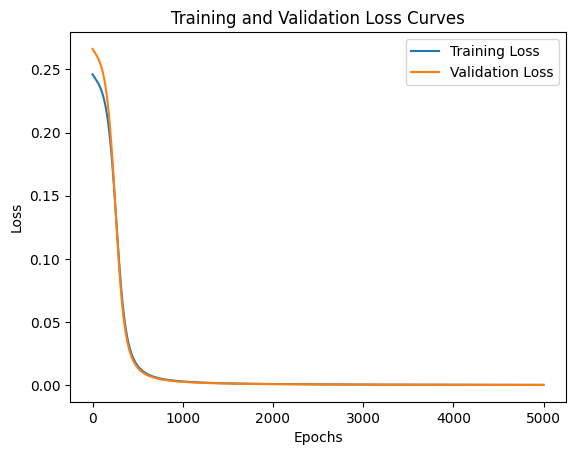

In [52]:
# Validation Loss Curve
plt.plot(xor_train_losses, label='Training Loss')
plt.plot(xor_val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Curves')
plt.show()

#### Generate Validation Loss curves for classifying data as stress/not stressed.

In [53]:
np.random.seed(42)
# Given Data
mu_stress = np.array([120, 35])
sigma_stress = np.array([[1, 0], [0, 1]])

mu_notstress = np.array([60, 50])
sigma_notstress = np.array([[1, 1], [1, 1]])

In [54]:
X_stress = np.random.multivariate_normal(mu_stress, sigma_stress, 500)
X_notstress = np.random.multivariate_normal(mu_notstress, sigma_notstress, 500)

In [55]:
y_stress = np.ones((500, 1))
y_notstress = np.zeros((500, 1))

In [56]:
X = np.vstack((X_stress, X_notstress))
y = np.vstack((y_stress, y_notstress))

In [57]:
# Shuffle dataset
indices = np.arange(len(X))
np.random.shuffle(indices)
X, y = X[indices], y[indices]

In [58]:
#Split into training (75%) and validation (25%)
split_idx = int(0.75 * len(X))
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

In [59]:
nn = Network(loss=mse, loss_derivative=mse_derivative)

nn.add(FCLayer(input_size=2, output_size=4)) 
nn.add(ActivationLayer(tanh, tanh_derivative))  
nn.add(FCLayer(input_size=4, output_size=1))  
nn.add(ActivationLayer(sigmoid, sigmoid_derivative))  

In [60]:
# Train the Model
train_losses, val_losses = nn.fit(X_train, y_train, X_val, y_val, epochs=5000, lr=0.01)

Epoch 0, Train Loss: 0.0894103883499458, Validation Loss: 0.09216875602854815
Epoch 100, Train Loss: 0.062201105500290545, Validation Loss: 0.06370851806870205
Epoch 200, Train Loss: 0.04688818680858087, Validation Loss: 0.04778729345980145
Epoch 300, Train Loss: 0.03733225923856091, Validation Loss: 0.03790912655734489
Epoch 400, Train Loss: 0.030864666433072657, Validation Loss: 0.03125704678726007
Epoch 500, Train Loss: 0.026218387048605026, Validation Loss: 0.026498098042590863
Epoch 600, Train Loss: 0.02272952799184367, Validation Loss: 0.022936679982054335
Epoch 700, Train Loss: 0.020019752553612116, Validation Loss: 0.02017808088970286
Epoch 800, Train Loss: 0.01785842580282575, Validation Loss: 0.01798267420929977
Epoch 900, Train Loss: 0.016097188129429778, Validation Loss: 0.016196898388914815
Epoch 1000, Train Loss: 0.014636378218731394, Validation Loss: 0.014717945450354606
Epoch 1100, Train Loss: 0.013406629378010224, Validation Loss: 0.013474470901939461
Epoch 1200, Train

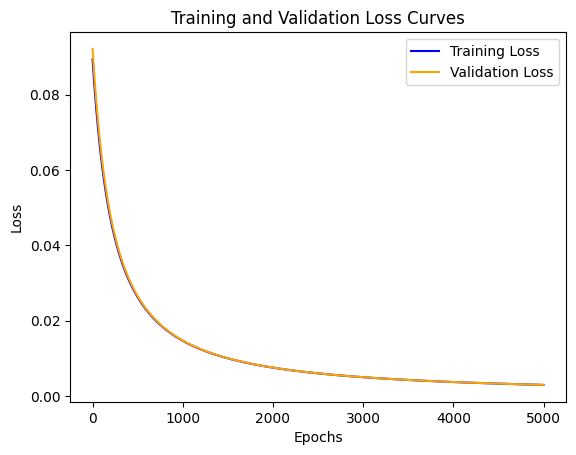

In [61]:
# Plot Training & Validation Loss
plt.plot(train_losses, label="Training Loss", color='blue')
plt.plot(val_losses, label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves")
plt.legend()
plt.show()

In [62]:
test_samples = np.array([
    [119.8, 34.5],  # Stress category
    [121.2, 35.3],  # Stress category
    [120.5, 34.2],  # Stress category
    [61.1, 49.2],   # Not stress category
    [58.9, 50.8]    # Not stress category
])

predictions = nn.predict(test_samples)

pred = (predictions > 0.5).astype(int)

for i, sample in enumerate(test_samples):
    pred_value = predictions[i].item()  
    print(f"Sample {i+1}: Data = {sample}")
    print(f"Predicted Output: {pred_value:.4f}")  
    print(f"Classified as: {'Stress (1)' if pred[i] == 1 else 'Not Stress (0)'}")
    print('-' * 40)

Sample 1: Data = [119.8  34.5]
Predicted Output: 0.9467
Classified as: Stress (1)
----------------------------------------
Sample 2: Data = [121.2  35.3]
Predicted Output: 0.9467
Classified as: Stress (1)
----------------------------------------
Sample 3: Data = [120.5  34.2]
Predicted Output: 0.9467
Classified as: Stress (1)
----------------------------------------
Sample 4: Data = [61.1 49.2]
Predicted Output: 0.0548
Classified as: Not Stress (0)
----------------------------------------
Sample 5: Data = [58.9 50.8]
Predicted Output: 0.0548
Classified as: Not Stress (0)
----------------------------------------


### Question 3

#### 3(a) Explain how the learning rate impacts the gradient descent algorithm

The gradient descent formula to update the parameters is:


$$
\theta_{new} = \theta_{old} - \alpha \cdot \nabla_\theta L(\theta)
$$

Where:
- $ theta $ is the weight or parameter,
- $ alpha $ is the learning rate,
- $ \nabla_\theta L(\theta) $ is the gradient of the loss function with respect to the weights.

The **learning rate** in gradient descent controls how much the model weights are adjusted with respect to the gradient of the loss function.

**Impact of Learning Rate:** <br>
**Too High Learning Rate**: If the learning rate is too large, the loss function oscillates or increase over time. It leads to exploding gradient problem. When the learning rate is too high, $ \nabla_\theta L(\theta) $ becomes large and the updates to the weights are large. so, the weights keep on oscilatting and the model might fail to converge or even diverge.
  
**Too Low Learning Rate**: If the learning rate is too small, $ \nabla_\theta L(\theta) $ becomes small and the updates to the weights are very tiny, leading to very slow convergence. It leads to vanishing gradient problem. In this case it takes so many iterations to find the optimal solution (or to converge) or it might get stuck in a local minimum.

The ideal learning rate helps the model converge at a good pace without oscillations or getting stuck.

#### 3(b) Detail how AdaGrad works and why/how RMSprop improves on AdaGrad

**AdaGrad** is an adaptive gradient descent method. Unlike standard gradient descent, where a fixed learning rate is used for all parameters, Adagrad adapts the learning rate based on the historical gradients for each parameter. It is defined as:

$$
\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{G_t + \epsilon}} \cdot \nabla_\theta L(\theta)
$$

Where:
- $ G_t $ is the sum of squares of the gradients up to time step $ t $, i.e., $ G_t = \sum_{i=1}^{t} (\nabla_\theta L(\theta))^2 $,
- $ epsilon $ is a small value to prevent division by zero.

AdaGrad works well for sparse data, but it has a key limitation:
- **Diminishing Learning rate**: One of the main problems of Adagrad is the diminishing learning rate. As training progresses, the sum of squared gradients $ G_t $ keeps increasing, causing the effective learning rate to decrease. This leads to a situation where the learning rate becomes too small, which can result in slower convergence or premature halting of updates, especially in the later stages of training.

**RMSprop (Root Mean Square Propagation)** improves on AdaGrad by using a moving average of the squared gradients. Instead of accumulating the sum, RMSProp introduces an exponentially decaying average of the squared gradients to address the diminishing learning rate problem. This increases the algorithm's effectiveness in training deep neural networks by preventing the learning rate from decreasing too rapidly.

$$
G_t = \beta \cdot G_{t-1} + (1 - \beta) \cdot (\nabla_\theta L(\theta))^2
$$

Where $ beta $ is a decay factor (usually set to around 0.9). The update rule becomes:

$$
\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{G_t + \epsilon}} \cdot \nabla_\theta L(\theta)
$$

This means RMSprop maintains computes a moving average of the gradients, which prevents the learning rate from continually decreasing. It helps the algorithm maintain a more consistent learning rate throughout the training process and ensures that the learning rate is neither too large nor too small.

#### 3(c) Detail how the Adam optimizer works

Adam (short for Adaptive Moment Estimation) optimizer combines the strengths of two other well-known techniques - Momentum and RMSprop, to deliver a powerful method for adjusting the learning rates of parameters during training.

**1. Momentum**: Momentum accelerates the process of gradient descent by adding an exponentially weighted moving average of previous gradients. This smoothes out the trajectory of optimization, enabling the algorithm to converge more quickly by avoiding oscillations.

The update rule with momentum is:

$$
w_{t+1} = w_t - \alpha m_t
$$

where:
- $m_t$ is the moving average of the gradients at time $t$,
- $\alpha$ is the learning rate,
- $w_t$ and $w_{t+1}$ are the weights at time $t$ and $t+1$, respectively.

The momentum term $m_t$ is updated recursively as:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \frac{\partial L}{\partial w_t}
$$

where:
- $\beta_1$ is the momentum parameter (usually set to 0.9),
- $\frac{\partial L}{\partial w_t}$ is the gradient of the loss function with respect to the weights at time $t$.

The update rule for momentum is:
   $$
   m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot \nabla_\theta L(\theta)
   $$

**2. RMSprop (Root Mean Square Propagation)**: RMSprop is an adaptive learning rate approach that is better than AdaGrad. Instead of accumulating the squared gradients, RMSprop accumulates an exponentially weighted moving average of squared gradients, which removes the issue of vanishing learning rates.

The update rule for RMSprop is:

$$
w_{t+1} = w_t - \alpha_t \frac{v_t + \epsilon}{\sqrt{\frac{\partial L}{\partial w_t}}}
$$

where:
- $v_t$ is the exponentially weighted average of squared gradients:
  
**Combining Momentum and RMSprop: Adam Optimizer**
The Adam update rule computes adaptive learning rates for each parameter using both the first and second moments of the gradients (mean and uncentered variance). It uses the following steps:

First moment (mean) estimate:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \frac{\partial L}{\partial w_t}
$$

Second moment (variance) estimate:

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) \left( \frac{\partial L}{\partial w_t} \right)^2
$$

Bias correction: Since both $m_t$ and $v_t$ are initialized at zero, they tend to be biased toward zero, especially during the initial steps. To correct this bias, Adam computes the bias-corrected estimates:

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$$

$$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

Final weight update: The weights are then updated as:

$$
w_{t+1} = w_t - \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} \cdot \alpha
$$

Key Parameters in Adam:
- $\alpha$: The learning rate or step size (default is 0.001).
- $\beta_1$ and $\beta_2$: Decay rates for the moving averages of the gradient and squared gradient, usually set to $\beta_1 = 0.9$ and $\beta_2 = 0.999$.
- $\epsilon$: A small positive constant (e.g., $10^{-8}$) used to avoid division by zero when computing the final update.


**Advantages**:
- Dynamic learning rates: Each parameter has an adaptive learning rate depending on previous gradients and their magnitudes. This allows the optimizer to escape oscillations and avoid local minima more effectively.
- Bias correction: By adjusting the early bias when the first and second moment estimates are near zero, Adam prevents instability in the initial stages.
- Efficient performance: Adam needs less hyperparameter tuning than other optimization methods such as SGD, which makes it an easier option to select for most issues.


#### 3(d) Explain the difference between Bagging and Boosting Methods (make sure you talk about bias/variance and the relationship to decision trees)

Bagging and Boosting are ensemble machine learning methods applied to improve the performance of machine learning models, especially decision trees. The major difference between them is the way in which they build their models. 

**Bagging (Bootstrap Aggregating)** trains multiple base models (typically decision trees) in parallel on different random subsets of the training data independently. It makes the final prediction through averaging the predictions (for regression) or voting (for classification). Bagging reduces the model variance through averaging predictions of different models and preventing overfitting. However, it does not decrease the bias significantly since all base learners (e.g., decision trees) are typically trained in parallel with the same algorithm. Decision trees are high-variance learners because they can overfit the training data. Bagging works well to reduce the overfitting by averaging out the noise in the individual decision trees. It reduces variance without affecting bias much. 
Example : Random Forest

On the other hand, **Boosting** builds models in a sequence, with each model attempting to correct the errors of the previous one. It gives more importance to the points classified incorrectly in each round, modifying their weights such that subsequent models pay closer attention to these instances. This process reduces bias by combining the predictions of many weak models (like shallow decision trees). Boosting can increase variance. Though it reduces bias by iteratively refining the model, boosting is prone to increasing variance as it will overfit the training set if it adds too many models. This occurs particularly if base learners are too powerful, i.e., decision trees with too many levels. But with the constraint on the model (e.g., using early stopping or constraining tree depth), boosting can control variance. Boosting decision trees are shallow trees or stumps. They are weak learners with high bias and low variance in individual use. Boosting combines several weak learners to generate a strong model. Boosting reduces bias and variance under favorable conditions because the model is being progressively improved round after round from past mistakes.
Example: XGBoost

#### 3(e) What is Gradient Boosting and describe how it works
Gradient Boosting is an ensemble method used for classification and regression tasks. It is a form of boosting where multiple weak learners are used to make a strong prediction model. It learns the models in sequence in such a manner that each model tries to rectify the errors of the previous one.

In gradient boosting, each new model is learned to decrease the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. In each iteration, the algorithm finds the gradient of the loss function with respect to the predictions, and then learns a new weak model that minimizes this gradient. The new model's predictions are added to the ensemble and the cycle is repeated until a stopping criterion is reached.

**Working of Gradient Boosting:**
- Start with an initial model (usually a simple one).
- Calculate the residuals (errors between true values and predictions).
- Fit a new model to these residuals.
- Update the overall model by adding the new model's predictions, weighted by the learning rate.
- Repeat from step 2 to step 4 until a stopping criterion is met (like a fixed number of iterations or when no further improvement is seen).

#### 3(f) Explain why neural networks are prone to overfitting
Neural networks can overfit due to their capacity to model complex relationships within data and their adaptability. Overfitting occurs when the model not only captures the underlying patterns but also noise and unrelevant features in the training data, resulting in bad generalization on new, unseen data.

There are several reasons why neural networks are particularly susceptible to overfitting:

- Deep neural netwoks with a lot of layers and neurons, have a very high capacity to fit data. If a network contains more parameters than the size of the training data, then it can memorize the data to perfection and overfit. This is especially the case for networks with a lot of layers and neurons (deep learning models).

- Deep neural networks have the capability to learn very intricate functions. While this is helpful in learning difficult patterns in the data, it also increases the model's susceptibility to learning to fit the noise and outliers in the training set, rather than learning the common underlying patterns.

- When there is not enough training data, the network will be more likely to memorize data, outliers, and noise, instead of generalizing. In this case, the model ends up learning patterns that will not generalize to new, unseen data.